Aqui ocorrem:
1. os testes de agrupamento com o Agrupamento Aglomerativo, para avaliação da quantidade de grupos a considerar no agrupamento definitivo;

A etapa extra de seleção de atributos não foi executada sobre o conjunto de dados utilizado aqui.

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [6]:
X = pd.read_csv('cursos-ufrpe-pos-processamento.csv',sep=';')

In [7]:
X.shape

(46, 42)

In [8]:
X.shape

(46, 42)

In [9]:
X_to_train = X.drop(['no_curso','co_curso'],axis=1)

In [10]:
min_clusters = 2
max_clusters = 20
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg_clustering.fit_predict(X_to_train)

    silhouette = silhouette_score(X_to_train, labels)
    calinski = calinski_harabasz_score(X_to_train, labels)
    davies = davies_bouldin_score(X_to_train, labels)

    results.append((n_clusters, silhouette, calinski, davies))

columns = ["Cluster", "Silhouette Coefficient", "Calinski-Harabasz Index", "Davies-Bouldin Index"]
df = pd.DataFrame(results, columns=columns)


In [11]:
df

,Cluster,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index
0,2,0.197533,11.741929,1.271981
1,3,0.181909,11.101357,1.838512
2,4,0.209901,10.804716,1.560183
3,5,0.237440,11.055284,1.396174
4,6,0.215787,10.505056,1.464867
5,7,0.215642,9.604535,1.492474
6,8,0.214593,8.989599,1.446882
7,9,0.203552,8.464518,1.343649
8,10,0.183873,8.108693,1.339840
9,11,0.180189,7.731664,1.206530


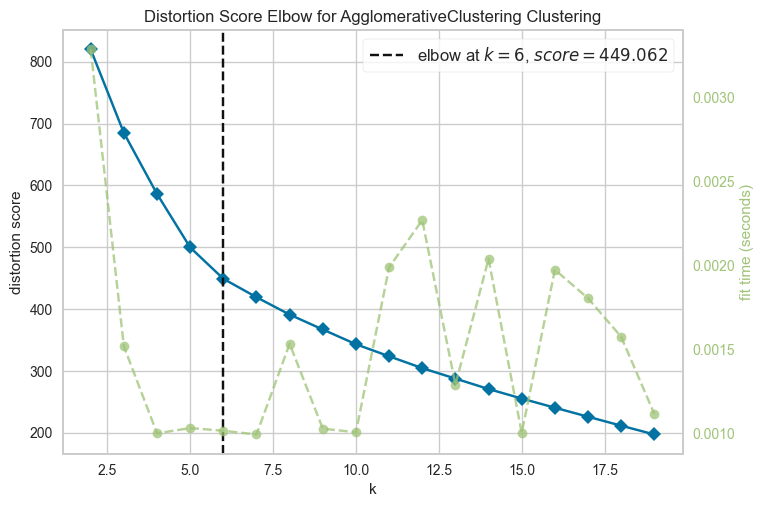

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2, 20))
visualizer.fit(X_to_train)
visualizer.show()

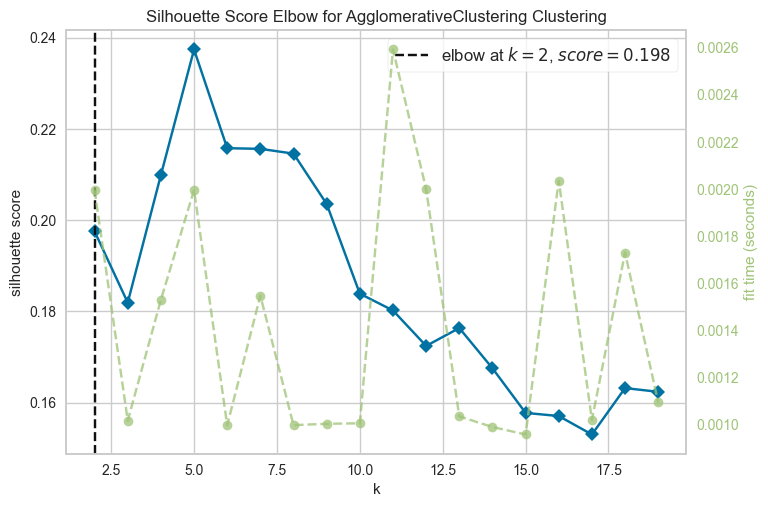

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [13]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2, 20),metric='silhouette')
visualizer.fit(X_to_train)
visualizer.show()

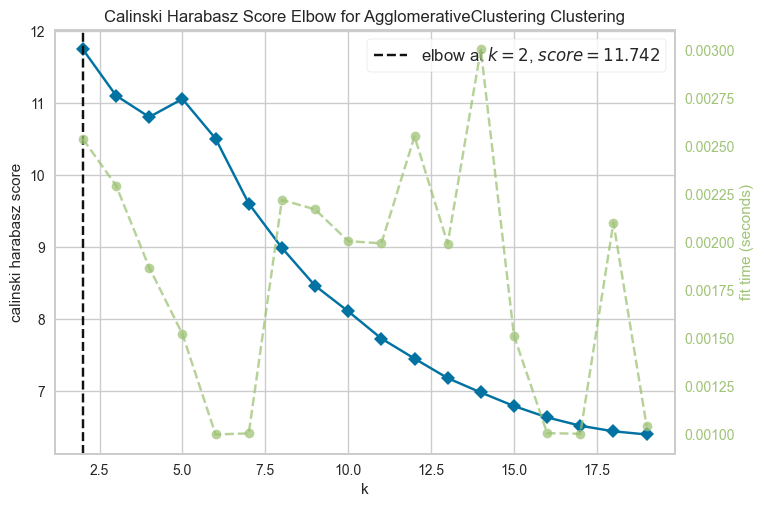

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [14]:
visualizer = KElbowVisualizer(AgglomerativeClustering(linkage='ward'), k=(2, 20),metric='calinski_harabasz')
visualizer.fit(X_to_train)
visualizer.show()

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
linkage_matrix = linkage(X_to_train, method='ward')

In [17]:
lista = list(X.no_curso)

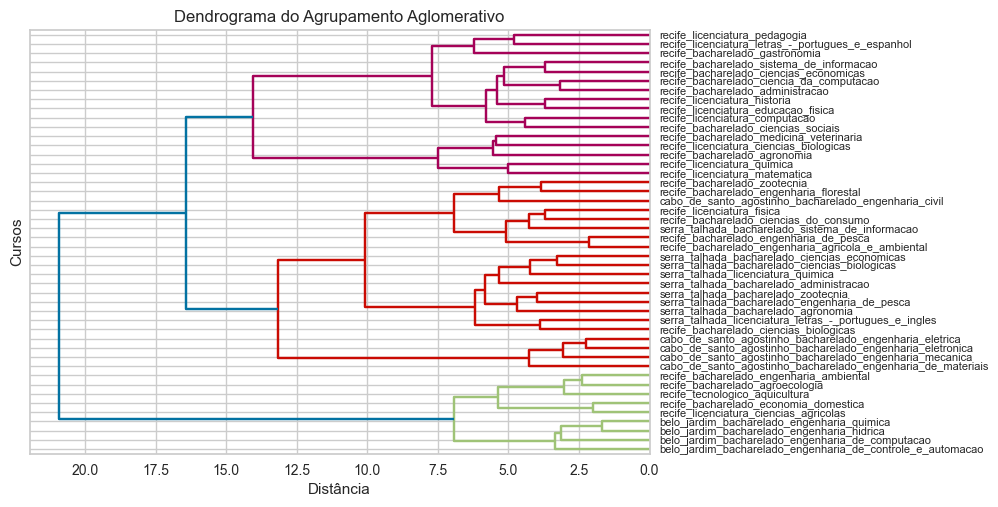

In [18]:
dendrogram(linkage_matrix, labels=lista, orientation='left')
plt.title("Dendrograma do Agrupamento Aglomerativo")
plt.ylabel("Cursos")
plt.xlabel("Distância")
plt.show()

In [19]:
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglomerative.fit(X_to_train)

AgglomerativeClustering(n_clusters=5)

In [20]:
X_to_train['label'] = agglomerative.labels_

In [21]:
X_to_train['no_curso'] = X['no_curso']

In [22]:
X_to_train.label.value_counts()

0    17
2    11
3     9
1     5
4     4
Name: label, dtype: int64

In [23]:
for i in range(0, 5):
    cursos_cluster_i = list(X_to_train.query('label == @i')['no_curso'])
    print('Cluster', i+1, '-', len(cursos_cluster_i), 'cursos')
    
    for curso in cursos_cluster_i:
        print(curso)
    
    print()


Cluster 1 - 17 cursos
cabo_de_santo_agostinho_bacharelado_engenharia_civil
recife_bacharelado_ciencias_biologicas
recife_bacharelado_ciencias_do_consumo
recife_bacharelado_engenharia_agricola_e_ambiental
recife_bacharelado_engenharia_de_pesca
recife_bacharelado_engenharia_florestal
recife_licenciatura_fisica
recife_bacharelado_zootecnia
serra_talhada_bacharelado_administracao
serra_talhada_bacharelado_agronomia
serra_talhada_bacharelado_ciencias_biologicas
serra_talhada_bacharelado_ciencias_economicas
serra_talhada_bacharelado_engenharia_de_pesca
serra_talhada_licenciatura_letras_-_portugues_e_ingles
serra_talhada_licenciatura_quimica
serra_talhada_bacharelado_sistema_de_informacao
serra_talhada_bacharelado_zootecnia

Cluster 2 - 5 cursos
recife_bacharelado_agronomia
recife_licenciatura_ciencias_biologicas
recife_licenciatura_matematica
recife_bacharelado_medicina_veterinaria
recife_licenciatura_quimica

Cluster 3 - 11 cursos
recife_bacharelado_administracao
recife_bacharelado_ciencia_